### Notes 
1. Importing Spreadsheets or CSV files (QGIS3) - https://www.qgistutorials.com/en/docs/3/importing_spreadsheets_csv.html
2. Nearest Neighbor Analysis (QGIS3) - https://www.qgistutorials.com/en/docs/3/nearest_neighbor_analysis.html
3. Getting list of coordinates (lat,long) from OSMNX Geoseries - https://copyprogramming.com/howto/plotting-a-route-with-osmnx
4. QNEAT3 Algorithms - https://root676.github.io/OdMatrixAlgs
5. Source Paper - https://www.researchgate.net/publication/319291962_The_Traditional_Four_Steps_Transportation_Modeling_Using_Simplified_Transport_Network_A_Case_Study_of_Dhaka_City_Bangladesh

In [1]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt

### Steps in Generating Demand Matrix

#### 1. Determine barangay centroids for each city (data from philatlas.com) and concatenate

In [2]:
df1 = pd.read_csv("demographics-from-philatlas-final-1.csv")
df2 = pd.read_csv("demographics-from-philatlas-final-2.csv")
df3 = pd.read_csv("demographics-from-philatlas-final-3.csv")
df4 = pd.read_csv("demographics-from-philatlas-final-4.csv")
df5 = pd.read_csv("demographics-from-philatlas-final-5.csv")
df6 = pd.read_csv("demographics-from-philatlas-final-6.csv")
df7 = pd.read_csv("demographics-from-philatlas-final-7.csv", encoding='latin1')
df8 = pd.read_csv("demographics-from-philatlas-final-8.csv")
df9 = pd.read_csv("demographics-from-philatlas-final-9.csv")
df10 = pd.read_csv("demographics-from-philatlas-final-10.csv")
df11 = pd.read_csv("demographics-from-philatlas-final-11.csv")
df12 = pd.read_csv("demographics-from-philatlas-final-12.csv")
df13 = pd.read_csv("demographics-from-philatlas-final-13.csv")
df14 = pd.read_csv("demographics-from-philatlas-final-14.csv")
df15 = pd.read_csv("demographics-from-philatlas-final-15.csv")
df16 = pd.read_csv("demographics-from-philatlas-final-16.csv")
df17 = pd.read_csv("demographics-from-philatlas-final-17.csv")

In [3]:
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]

df = pd.concat(df_list)
df.head()

,Unnamed: 0,Coordinates,"2,020",2015_cat1,2015_cat2,2015_cat3,2015_cat1%,2015_cat2%,2015_cat3%,District
0,CBarangay 1,"14.6589, 120.9732","2,319",601,"1,702",114,24.87,70.42,4.72,NaN
1,CBarangay 10,"14.6544, 120.9714","1,485",297,967,75,22.18,72.22,5.60,NaN
2,CBarangay 100,"14.6538, 120.9958",983,203,729,52,20.63,74.09,5.28,NaN
3,CBarangay 101,"14.6505, 120.9931","2,517",525,"1,718",141,22.02,72.06,5.91,NaN
4,CBarangay 102,"14.6497, 120.9943","1,033",234,866,57,20.22,74.85,4.93,NaN


In [4]:
df1.tail()

,Unnamed: 0,Coordinates,"2,020",2015_cat1,2015_cat2,2015_cat3,2015_cat1%,2015_cat2%,2015_cat3%
183,CBarangay 95,"14.6563, 120.9973","2,242",654,"1,995",135,23.49,71.66,4.85
184,CBarangay 96,"14.6543, 120.9932","1,366",322,"1,138",80,20.91,73.90,5.19
185,CBarangay 97,"14.6526, 120.9930","1,537",442,"1,146",66,26.72,69.29,3.99
186,CBarangay 98,"14.6522, 120.9945","1,761",605,"1,487",90,27.73,68.15,4.12
187,CBarangay 99,"14.6549, 120.9972",677,123,604,45,15.93,78.24,5.83


In [5]:
# Rename column and split coordinates to Latitude and Longitude
df.rename(columns={'Unnamed: 0':'Barangay Name'}, inplace=True)
df.head()

,Barangay Name,Coordinates,"2,020",2015_cat1,2015_cat2,2015_cat3,2015_cat1%,2015_cat2%,2015_cat3%,District
0,CBarangay 1,"14.6589, 120.9732","2,319",601,"1,702",114,24.87,70.42,4.72,NaN
1,CBarangay 10,"14.6544, 120.9714","1,485",297,967,75,22.18,72.22,5.60,NaN
2,CBarangay 100,"14.6538, 120.9958",983,203,729,52,20.63,74.09,5.28,NaN
3,CBarangay 101,"14.6505, 120.9931","2,517",525,"1,718",141,22.02,72.06,5.91,NaN
4,CBarangay 102,"14.6497, 120.9943","1,033",234,866,57,20.22,74.85,4.93,NaN


In [6]:
barangay_centroids = df.drop(columns=["2,020","2015_cat1","2015_cat2","2015_cat3","2015_cat1%","2015_cat2%","2015_cat3%", "District"])
barangay_centroids.head()

,Barangay Name,Coordinates
0,CBarangay 1,"14.6589, 120.9732"
1,CBarangay 10,"14.6544, 120.9714"
2,CBarangay 100,"14.6538, 120.9958"
3,CBarangay 101,"14.6505, 120.9931"
4,CBarangay 102,"14.6497, 120.9943"


In [7]:
barangay_centroids[["Latitude","Longitude"]] = barangay_centroids["Coordinates"].str.split(",",expand=True)
barangay_centroids.head()

,Barangay Name,Coordinates,Latitude,Longitude
0,CBarangay 1,"14.6589, 120.9732",14.6589,120.9732
1,CBarangay 10,"14.6544, 120.9714",14.6544,120.9714
2,CBarangay 100,"14.6538, 120.9958",14.6538,120.9958
3,CBarangay 101,"14.6505, 120.9931",14.6505,120.9931
4,CBarangay 102,"14.6497, 120.9943",14.6497,120.9943


In [8]:
barangay_centroids.drop(columns=["Coordinates"],inplace=True)
barangay_centroids.head()

,Barangay Name,Latitude,Longitude
0,CBarangay 1,14.6589,120.9732
1,CBarangay 10,14.6544,120.9714
2,CBarangay 100,14.6538,120.9958
3,CBarangay 101,14.6505,120.9931
4,CBarangay 102,14.6497,120.9943


In [9]:
barangay_centroids.head()

,Barangay Name,Latitude,Longitude
0,CBarangay 1,14.6589,120.9732
1,CBarangay 10,14.6544,120.9714
2,CBarangay 100,14.6538,120.9958
3,CBarangay 101,14.6505,120.9931
4,CBarangay 102,14.6497,120.9943


In [ ]:
cities = (['Caloocan']*188 + ['Las Pinas']*20 + ['Makati']*33 + ['Malabon']*21 + ['Mandaluyong']*27 + ['Manila']*897 + 
          ['Marikina']*16 + ['Muntinlupa']*9 + ['Navotas']*18 + ['Paranaque']*16 + ['Pasay']*201 + ['Pasig']*30 +
          ['Pateros']*10 + ['Quezon']*142 + ['San Juan']*21 + ['Taguig']*28 + ['Valenzuela']*33)

barangay_centroids["Final Barangay Name"] = list(zip(barangay_centroids["Final Barangay Name"], cities))
barangay_centroids.head()

In [ ]:
barangay_centroids.drop(columns="Barangay Name", inplace=True)
barangay_centroids.rename(columns={'Final Barangay Name':'Barangay Name'}, inplace=True)

In [10]:
len(barangay_centroids)

1710

In [11]:
# Export Dataframe to file to be read into QGIS
barangay_centroids.to_csv('final_barangay_centroids.csv', index=False)

In [12]:
# Finalize bus nodes for QGIS
import openpyxl

def import_nodes(excel_filename,worksheet_name,len_sheet):
    wb = openpyxl.load_workbook(excel_filename)
    ws = wb[worksheet_name]

    # Convert to a DataFrame
    nodes_list = [ws.cell(row=i,column=2).value for i in range(2,len_sheet+1)]
    coordinates_list = [ws.cell(row=i,column=3).value for i in range(2,len_sheet+1)]
    df = pd.DataFrame(coordinates_list, index=nodes_list, columns=["lat-lon"])
    df["number"] = range(1,len_sheet)

    # Split 'lat-lon' column and drop
    df[["lat","lon"]] = df["lat-lon"].str.split(",",expand=True)
    df.drop(columns=["lat-lon"],inplace=True)

    # Change 'lat' and 'lon' columns to float
    df["lat"] = round( df["lat"].astype(float), 6)
    df["lon"] = round( df["lon"].astype(float), 6)

    return df

In [13]:
filename = "dataset_from_qgis.xlsx"
worksheet = "Coordinates"
len_sheet = 198
df_nodes_1 = import_nodes(filename,worksheet,len_sheet)
df_nodes_1.head()

,number,lat,lon
Monumento,1,14.654455,120.983795
Malanday,2,14.718282,120.957038
Mall of Asia,3,14.535539,120.983720
PITX,4,14.510395,120.992016
North EDSA,5,14.654670,121.029643


In [14]:
# Append additional nodes
filename2 = "dataset_from_qgis.xlsx"
worksheet2 = "Additional Nodes"
len_sheet2 = 35

df_nodes_2 = import_nodes(filename2,worksheet2,len_sheet2)

df_nodes = pd.concat([df_nodes_1, df_nodes_2])
df_nodes.head()

,number,lat,lon
Monumento,1,14.654455,120.983795
Malanday,2,14.718282,120.957038
Mall of Asia,3,14.535539,120.983720
PITX,4,14.510395,120.992016
North EDSA,5,14.654670,121.029643


In [15]:
print("Number of rows of df:",len(df_nodes))

Number of rows of df: 231


In [16]:
df_nodes.to_csv('final_bus_nodes.csv', index=True)

#### 2. Import barangay centroids to QGIS

The bus stops are colored blue, while the barangay centroids are colored pink.

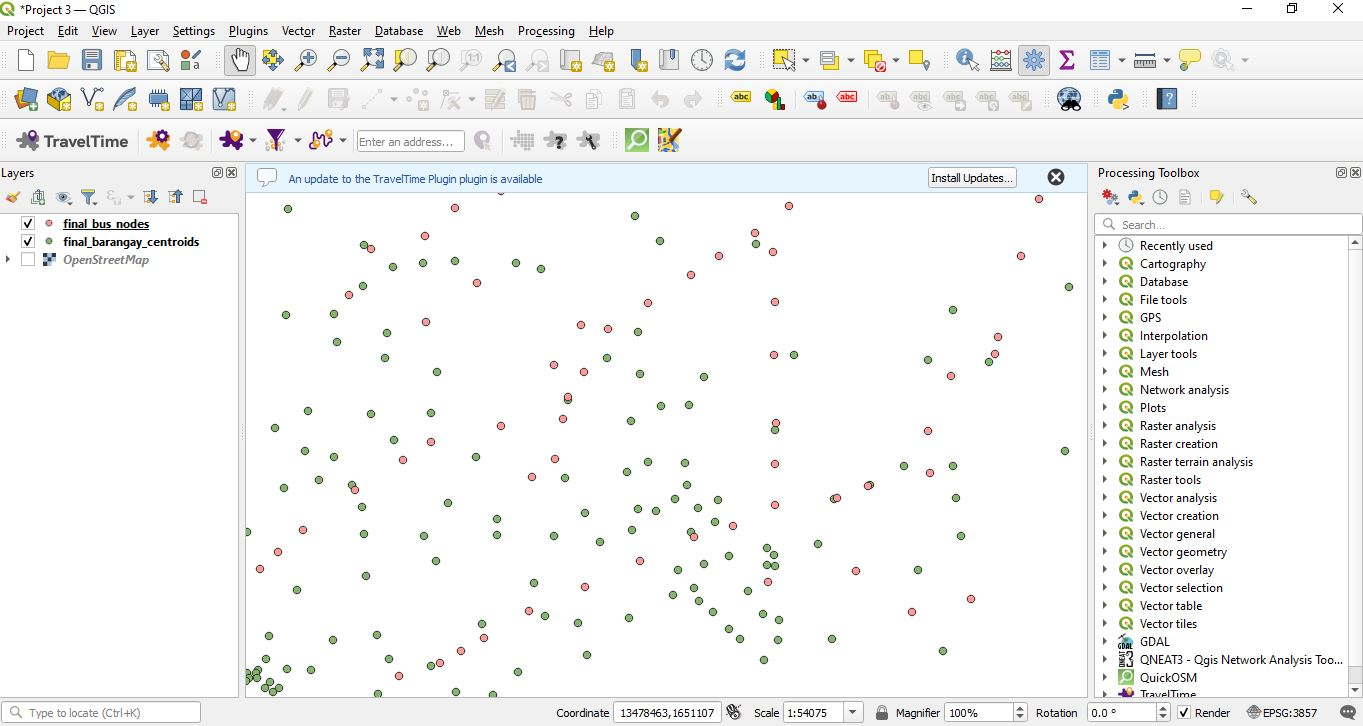

In [17]:
from IPython.display import Image

Image(filename='C1.jpg') 

#### 3. Using Nearest Neighbor Analysis in QGIS, determine the nearest bus stop node (filename: sample_barangay_centroids_to_nearest_node.csv)

Processing -> Toolbox -> Vector Analysis -> Distance to nearest hub (line to hub)

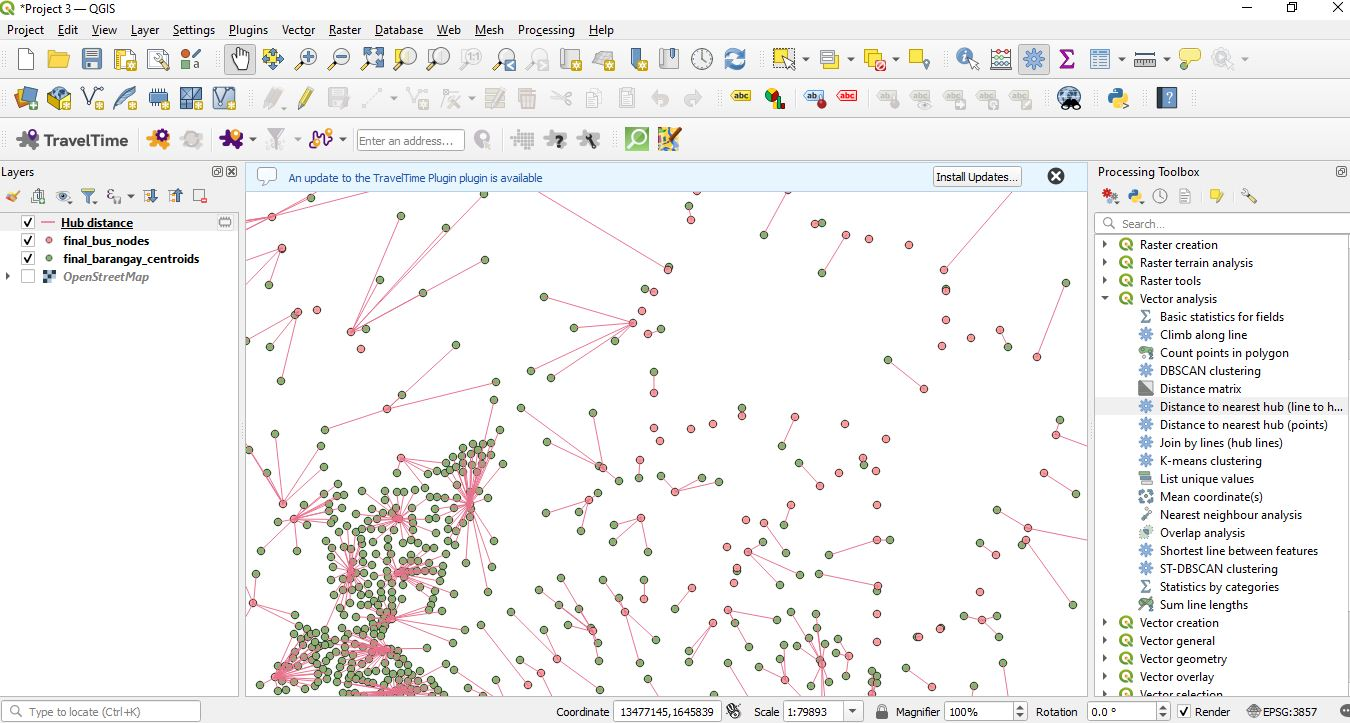

In [18]:
Image(filename='C2.jpg') 

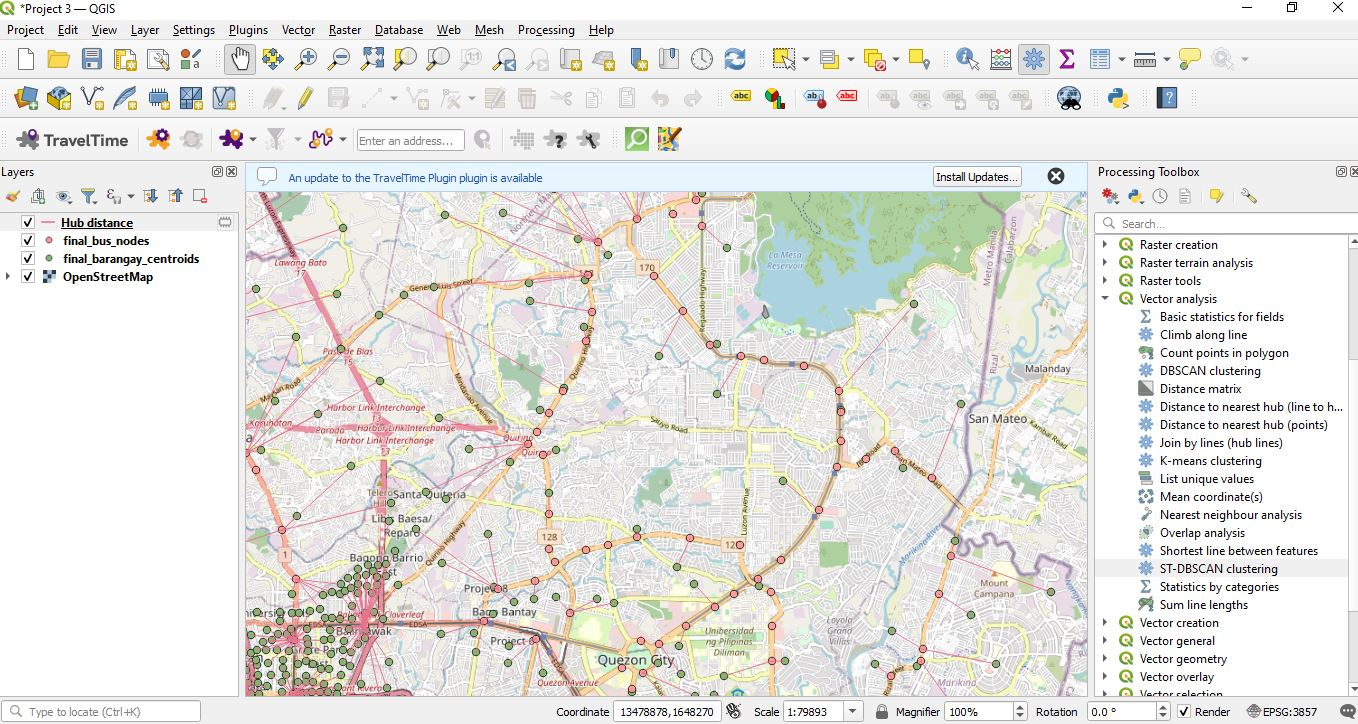

In [19]:
Image(filename='C3.jpg') 

##### Export "Hub Distance" as a csv file named "final_barangay_centroids_to_nearest_node.csv"

In [20]:
# CSV File generated from QGIS
df_centroids_to_node = pd.read_csv("final_barangay_centroids_to_nearest_node.csv")
df_centroids_to_node.head()

,Barangay Name,Latitude,Longitude,HubName,HubDist
0,CBarangay 1,14.6589,120.9732,Lapu-lapu,1.124482
1,CBarangay 10,14.6544,120.9714,Lapu-lapu,0.817851
2,CBarangay 100,14.6538,120.9958,Bagong Barrio,0.405237
3,CBarangay 101,14.6505,120.9931,Bagong Barrio,0.861712
4,CBarangay 102,14.6497,120.9943,Bagong Barrio,0.886750


In [21]:
df_centroids_to_node["HubName"].nunique()

188

In [ ]:
# Re-run using unused nodes
list1 = list(df_nodes.index)
list2 = list(df_centroids_to_node["HubName"].unique())
nodes_to_rerun = list(set(list1)-set(list2))
len(nodes_to_rerun)

In [ ]:
df_nodes_rerun = df_nodes.loc[nodes_to_rerun]
df_nodes_rerun.head()

In [ ]:
df_nodes_rerun.to_csv('final_rerun_bus_nodes.csv', index=True)

In [22]:
# CSV File generated from QGIS
df_centroids_to_node_rerun = pd.read_csv("final_rerun_barangay_centroids_to_nearest_node.csv")
df_centroids_to_node_rerun.head()

,field_1,number,lat,lon,HubName,HubDist
0,Lanuza Ave,176,14.578144,121.073569,Ugong,0.544050
1,Pearl Drive,79,14.705884,121.072886,North Fairview,1.013496
2,Susana Heights,153,14.386639,121.045008,Poblacion,0.284243
3,DAR,14,14.654327,121.049542,Old Capitol Site,0.582549
4,RMC,140,14.564691,121.065620,Bagong Ilog,0.591430


In [23]:
# Rename columns
df_centroids_to_node_rerun.rename(columns={'HubName':'Barangay Name','field_1':'HubName','lat':'Latitude', 'lon':'Longitude'}, inplace=True)
df_centroids_to_node_rerun.drop(columns=["number"], inplace=True)
df_centroids_to_node_rerun.head()

,HubName,Latitude,Longitude,Barangay Name,HubDist
0,Lanuza Ave,14.578144,121.073569,Ugong,0.544050
1,Pearl Drive,14.705884,121.072886,North Fairview,1.013496
2,Susana Heights,14.386639,121.045008,Poblacion,0.284243
3,DAR,14.654327,121.049542,Old Capitol Site,0.582549
4,RMC,14.564691,121.065620,Bagong Ilog,0.591430


In [24]:
df_centroids_to_node_final = pd.concat([df_centroids_to_node, df_centroids_to_node_rerun])
df_centroids_to_node_final

,Barangay Name,Latitude,Longitude,HubName,HubDist
0,CBarangay 1,14.658900,120.973200,Lapu-lapu,1.124482
1,CBarangay 10,14.654400,120.971400,Lapu-lapu,0.817851
2,CBarangay 100,14.653800,120.995800,Bagong Barrio,0.405237
3,CBarangay 101,14.650500,120.993100,Bagong Barrio,0.861712
4,CBarangay 102,14.649700,120.994300,Bagong Barrio,0.886750
...,...,...,...,...,...
38,Karuhatan,14.685693,120.976480,SM City Valenzuela,0.424621
39,Malinta,14.692952,120.968104,Valenzuela City Hall,0.467504
40,Matandang Balara,14.663352,121.074227,Matandang Balara,0.261815
41,Rosario,14.585557,121.078620,Tiendesitas,0.628224


In [26]:
df_centroids_to_node_final = df_centroids_to_node

In [27]:
df_centroids_to_node_final["Barangay Name"].nunique()

1677

In [28]:
df_centroids_to_node_final["HubName"].nunique()

188

In [29]:
df_centroids_to_node_final

,Barangay Name,Latitude,Longitude,HubName,HubDist
0,CBarangay 1,14.6589,120.9732,Lapu-lapu,1.124482
1,CBarangay 10,14.6544,120.9714,Lapu-lapu,0.817851
2,CBarangay 100,14.6538,120.9958,Bagong Barrio,0.405237
3,CBarangay 101,14.6505,120.9931,Bagong Barrio,0.861712
4,CBarangay 102,14.6497,120.9943,Bagong Barrio,0.886750
...,...,...,...,...,...
1705,Rincon,14.6974,120.9590,Dalandanan,0.796040
1706,Tagalag,14.7270,120.9364,Malanday,2.422770
1707,Ugong,14.6953,121.0112,Quirino Mindanao Ave,1.899516
1708,Viente Reales,14.7135,120.9670,T Santiago,0.885702


#### 4. Centroids to Corresponding Node

In [30]:
df_cn = df_centroids_to_node_final[["Barangay Name","HubName"]]
#df_cn.set_index('Barangay Name', inplace=True)
df_cn

,Barangay Name,HubName
0,CBarangay 1,Lapu-lapu
1,CBarangay 10,Lapu-lapu
2,CBarangay 100,Bagong Barrio
3,CBarangay 101,Bagong Barrio
4,CBarangay 102,Bagong Barrio
...,...,...
1705,Rincon,Dalandanan
1706,Tagalag,Malanday
1707,Ugong,Quirino Mindanao Ave
1708,Viente Reales,T Santiago


In [31]:
df_cn_final = df_cn.groupby(['HubName'])['Barangay Name'].apply(','.join).reset_index()
df_cn_final

,HubName,Barangay Name
0,11th Ave,Pineda
1,15th Ave,"E. Rodriguez,East Kamias,San Roque,Silangan"
2,5th Ave 1,"CBarangay 103,CBarangay 104,CBarangay 105,CBar..."
3,5th Ave 2,"MBarangay 127,MBarangay 128,NBBS Kaunlaran,NBB..."
4,A Mabini,"CBarangay 13,CBarangay 15,CBarangay 16,CBarang..."
...,...,...
183,Vicente Cruz,"MBarangay 440,MBarangay 441,MBarangay 442,MBar..."
184,Victoneta Ave,"CBarangay 132,CBarangay 142,CBarangay 82,CBara..."
185,Waltermart Sucat,San Isidro
186,Yakal,Santa Lucia


In [32]:
df_cn_final.rename(columns={'HubName':'Node','Barangay Name':'Centroids'}, inplace=True)
df_cn_final

,Node,Centroids
0,11th Ave,Pineda
1,15th Ave,"E. Rodriguez,East Kamias,San Roque,Silangan"
2,5th Ave 1,"CBarangay 103,CBarangay 104,CBarangay 105,CBar..."
3,5th Ave 2,"MBarangay 127,MBarangay 128,NBBS Kaunlaran,NBB..."
4,A Mabini,"CBarangay 13,CBarangay 15,CBarangay 16,CBarang..."
...,...,...
183,Vicente Cruz,"MBarangay 440,MBarangay 441,MBarangay 442,MBar..."
184,Victoneta Ave,"CBarangay 132,CBarangay 142,CBarangay 82,CBara..."
185,Waltermart Sucat,San Isidro
186,Yakal,Santa Lucia


In [33]:
df_cn_final.set_index("Node", inplace=True)
df_cn_final

,Centroids
Node,
11th Ave,Pineda
15th Ave,"E. Rodriguez,East Kamias,San Roque,Silangan"
5th Ave 1,"CBarangay 103,CBarangay 104,CBarangay 105,CBar..."
5th Ave 2,"MBarangay 127,MBarangay 128,NBBS Kaunlaran,NBB..."
A Mabini,"CBarangay 13,CBarangay 15,CBarangay 16,CBarang..."
...,...
Vicente Cruz,"MBarangay 440,MBarangay 441,MBarangay 442,MBar..."
Victoneta Ave,"CBarangay 132,CBarangay 142,CBarangay 82,CBara..."
Waltermart Sucat,San Isidro


#### 5. Solve for Trip Attraction Using OSMNX GeoSeries (nodes for amenity, landuse, shop)

In [34]:
def node_ID_to_coordinates(node_ID, G):
    x = G.nodes[node_ID]['x'] 
    y = G.nodes[node_ID]['y']
    return x,y

In [35]:
def feature_nodes(place, place_x, place_y, plot_features=False):

    # Get nodes surrounding a place
    #ox.config(use_cache=True, log_console=True)
    ox.settings.use_cache=True
    ox.settings.log_console=True

    # Initialization
    no_of_feature_nodes = []
    nn_all = []

    try:
        G = ox.graph_from_place(place, network_type='drive')
        #tags = {'amenity' : ['hospital','university','social_facility','cafe','fast_food','restaurant','college','research_institute','bank','veterinary'],
        #        'landuse' : ['retail','commercial','education','residential','cemetery'],
        #        'shop' : ['water','bakery','department_store','general','mall','supermarket']}
    
        tags_amenity = {'amenity' : ['hospital','university','social_facility','cafe','fast_food','restaurant','college','research_institute','bank','veterinary']}
        tags_landuse = {'landuse' : ['retail','commercial','education','residential']}
        tags_shop = {'shop' : ['water','bakery','department_store','general','mall','supermarket']}

        tags = [tags_amenity, tags_landuse, tags_shop]

        for tag in tags:
            gdf = ox.features_from_place(place, tag)
            #gdf["geometry"].to_crs(epsg=4326)
            centroids = gdf.centroid
            X = centroids.x
            Y = centroids.y
            nn = ox.nearest_nodes(G, X, Y)
            no_of_feature_nodes.append(len(nn))
        
            for n in nn:
                nn_all.append(n)

    except (ValueError, TypeError):
        no_of_feature_nodes = [0, 0, 0]

    if plot_features:
        # Plot these nodes
        plt.rcParams["figure.figsize"] = [4,6]
        plt.rcParams["figure.autolayout"] = True
        plt.xlim(120.90, 121.15)
        plt.ylim(14.35, 14.80)

        feature_df = pd.DataFrame(nn_all, columns=["node_id"])
        # initialize
        feature_node_IDs = []
        feature_node_coordinates = []
    
        for node in nn_all:
            x,y = node_ID_to_coordinates(node, G)
            # store the list of coordinates of new nodes
            zipxy = lambda a,b:(a,b)
            c = zipxy(x,y)
            feature_node_coordinates.append(c)
            # plot/visualize the raster nodes
            plt.plot(x, y, marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")

        #plt.plot(place_x, place_y, marker="o", markersize=2, markeredgecolor="pink", markerfacecolor="pink")
        feature_df["coordinates"] = feature_node_coordinates
        plt.show()

    return no_of_feature_nodes

In [ ]:
place = '12, Caloocan, Metro Manila, Philippines'
place_x = 120.9732
place_y = 14.6589
no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
no_of_feature_nodes

In [36]:
centroids = list(barangay_centroids["Barangay Name"])

In [37]:
centroids_final = []

for c in centroids[0:188]:
    centroids_final.append(c.replace('C',''))

for c in centroids[188:289]:
    centroids_final.append(c)

for c in centroids[289:1186]:
    centroids_final.append(c.replace('M',''))

for c in centroids[1186:1245]:
    centroids_final.append(c)

for c in centroids[1245:1446]:
    centroids_final.append(c.replace('P',''))

for c in centroids[1446:1710]:
    centroids_final.append(c)

In [38]:
df_cf = barangay_centroids
df_cf.set_index("Barangay Name", inplace=True)
df_cf.tail()

,Latitude,Longitude
Barangay Name,,
Rincon,14.6974,120.9590
Tagalag,14.7270,120.9364
Ugong,14.6953,121.0112
Viente Reales,14.7135,120.9670
Wawang Pulo,14.7334,120.9277


In [ ]:
cities = (['Caloocan']*188 + ['Las Pinas']*20 + ['Makati']*33 + ['Malabon']*21 + ['Mandaluyong']*27 + ['Manila']*897 + 
          ['Marikina']*16 + ['Muntinlupa']*9 + ['Navotas']*18 + ['Paranaque']*16 + ['Pasay']*201 + ['Pasig']*30 +
          ['Pateros']*10 + ['Quezon']*142 + ['San Juan']*21 + ['Taguig']*28 + ['Valenzuela']*33)

In [ ]:
len(cities)

In [ ]:
centroids_city = []
centroids_city = list(zip(centroids_final,cities))

In [ ]:
## Get the no. of features for each city

fc_1 = []

# Caloocan
for cc in centroids_city[0:188]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    place_x = df_cf["Longitude"]['C'+c1]
    place_y = df_cf["Latitude"]['C'+c1]
    print(place, place_x, place_y)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=False)
        fc_1.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_1.append("None")

fc_1

In [ ]:
place = 'Caloocan, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_1:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [469, 481, 179]
d1 = round(((tf1 - sum(af))/(188-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(188-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(188-len(af))), 1)

for i in range(len(fc_1)):
    if sum(fc_1[i]) == 0:
        fc_1[i] = [d1, d2, d3]

fc_1

In [ ]:
len(fc_1)

In [ ]:
fc_2 = []

# Las Pinas
for cc in centroids_city[188:208]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    print(place)
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=False)
        fc_2.append(no_of_feature_nodes)
    #except (ValueError, TypeError, NetworkXPointlessConcept):
    except (Exception):
        fc_2.append([0, 0, 0])

fc_2 

In [ ]:
len(fc_2)

In [ ]:
place = 'Las Pinas, Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
for i in range(len(fc_2)):
    if sum(fc_2[i]) == 0:
        fc_2[i] = [1, 1, 1]

fc_2

In [ ]:
fc_3 = []

# Makati
for cc in centroids_city[208:241]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    print(place)
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=False)
        fc_3.append(no_of_feature_nodes)
    #except (ValueError, TypeError, NetworkXPointlessConcept):
    except (Exception):
        fc_3.append([0, 0, 0])

fc_3 

In [ ]:
len(fc_3)

In [ ]:
place = 'Makati, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_3:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [1413, 272, 151]
d1 = round(((tf1 - sum(af))/(33-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(33-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(33-len(af))), 1)

for i in range(len(fc_3)):
    if sum(fc_3[i]) == 0:
        fc_3[i] = [d1, d2, d3]

fc_3

In [ ]:
fc_4 = []

# Malabon
for cc in centroids_city[241:262]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    print(place)
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=False)
        fc_4.append(no_of_feature_nodes)
    #except (ValueError, TypeError, NetworkXPointlessConcept):
    except (Exception):
        fc_4.append([0, 0, 0])

fc_4 

In [ ]:
len(fc_4)

In [ ]:
place = 'Malabon, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_4:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [135, 186, 35]
d1 = round(((tf1 - sum(af))/(21-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(21-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(21-len(af))), 1)

for i in range(len(fc_4)):
    if sum(fc_4[i]) == 0:
        fc_4[i] = [d1, d2, d3]

fc_4

In [ ]:
fc_5 = []

# Mandaluyong
for cc in centroids_city[262:289]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    print(place)
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=False)
        fc_5.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_5.append([0, 0, 0])

fc_5 

In [ ]:
len(fc_5)

In [ ]:
place = 'Mandaluyong, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_5:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [530, 209, 78]
d1 = round(((tf1 - sum(af))/(27-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(27-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(27-len(af))), 1)

for i in range(len(fc_5)):
    if sum(fc_5[i]) == 0:
        fc_5[i] = [d1, d2, d3]

fc_5

In [ ]:
len(fc_5)

In [ ]:
cc = centroids_city[314]
c1 = cc[0].replace('Barangay ', '')
c2 = cc[1]
place = c1 + ', ' + c2 + ' City, Philippines'
print(place)
place_x = df_cf["Longitude"]['MBarangay '+c1]
place_y = df_cf["Latitude"]['MBarangay '+c1]
no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
no_of_feature_nodes

In [ ]:
fc_6 = []

# Manila
for cc in centroids_city[289:750]:
    c1 = cc[0].replace('Barangay ', '')
    c2 = cc[1]
    place = c1 + ', ' + c2 + ' City, Philippines'
    place_x = df_cf["Longitude"]['MBarangay '+c1]
    place_y = df_cf["Latitude"]['MBarangay '+c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=False)
        fc_6.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_6.append("None")
    print(fc_6)
        

In [ ]:
fc_6

In [ ]:
# Manila
for cc in centroids_city[750:1186]:
    c1 = cc[0].replace('Barangay ', '')
    c2 = cc[1]
    place = c1 + ', ' + c2 + ' City, Philippines'
    place_x = df_cf["Longitude"]['MBarangay '+c1]
    place_y = df_cf["Latitude"]['MBarangay '+c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=False)
        fc_6.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_6.append("None")
    print(fc_6)

fc_6

In [ ]:
fc_6

In [ ]:
place = 'Manila City, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = round(2049/897, 1)
bf = round(350/897, 1)
cf = round(344/897, 1)

fc_6 = []

for i in range(0,897):
    fc_6.append([af, bf, cf])
    

In [ ]:
fc_6

In [ ]:
len(fc_6)

In [ ]:
fc_7 = []

# Marikina
for cc in centroids_city[1186:1202]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_7.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_7.append("None")

fc_7

In [ ]:
fc_7

In [ ]:
place = 'Marikina, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_7:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
sum(af), sum(bf), sum(cf)

In [ ]:
len(fc_7)

In [ ]:
fc_8 = []

# Muntinlupa
for cc in centroids_city[1202:1211]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_8.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_8.append("None")

fc_8

In [ ]:
fc_8

In [ ]:
place = 'Muntinlupa, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_8:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [549, 347, 100]
d1 = round(((tf1 - sum(af))/(9-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(9-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(9-len(af))), 1)

for i in range(len(fc_8)):
    if sum(fc_8[i]) == 0:
        fc_8[i] = [d1, d2, d3]

fc_8

In [ ]:
sum(af), sum(bf), sum(cf)

In [ ]:
fc_8[2] = [2.0, 0, 0]
fc_8

In [ ]:
len(fc_8)

In [ ]:
fc_9 = []

# Navotas
for cc in centroids_city[1211:1229]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ' City, Metro Manila, Philippines'
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_9.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_9.append("None")

fc_9

In [ ]:
len(fc_9)

In [ ]:
place = 'Navotas City, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = round(45/18, 1)
bf = round(875/18, 1)
cf = round(8/18, 1)

fc_9 = []

for i in range(0,18):
    fc_9.append([af, bf, cf])

len(fc_9)

In [ ]:
fc_9

In [ ]:
fc_10 = []

# Paranaque
for cc in centroids_city[1229:1245]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_10.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_10.append("None")

fc_10

In [ ]:
fc_10

In [ ]:
len(fc_10)

In [ ]:
place = 'Paranaque, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_10:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [825, 602, 131]
d1 = round(((tf1 - sum(af))/(16-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(16-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(16-len(af))), 1)

sum(af), sum(bf), sum(cf)

#for i in range(len(fc_10)):
#    if sum(fc_10[i]) == 0:
#        fc_10[i] = [d1, d2, d3]
#
#fc_10

In [ ]:
fc_10[15] = [5, 0, 0]
fc_10

In [ ]:
fc_11 = []

# Pasay
for cc in centroids_city[1245:1446]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    place_x = df_cf["Longitude"]['P'+c1]
    place_y = df_cf["Latitude"]['P'+c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_11.append(no_of_feature_nodes)
    #except (ValueError, TypeError, NetworkXPointlessConcept):
    except (Exception):
        fc_11.append([0, 0, 0])

fc_11

In [ ]:
fc_11

In [ ]:
place = 'Pasay, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_11:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [693, 147, 84]
d1 = round(((tf1 - sum(af))/(201-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(201-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(201-len(af))), 1)

for i in range(len(fc_11)):
    if sum(fc_11[i]) == 0:
        fc_11[i] = [d1, d2, d3]

fc_11

In [ ]:
len(fc_11)

In [ ]:
fc_12 = []

# Pasig
for cc in centroids_city[1446:1476]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_12.append(no_of_feature_nodes)
    #except (ValueError, TypeError, NetworkXPointlessConcept):
    except (Exception):
        fc_12.append([0, 0, 0])

fc_12

In [ ]:
fc_12

In [ ]:
place = 'Pasig, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_12:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [881, 403, 143]
d1 = round(((tf1 - sum(af))/(30-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(30-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(30-len(af))), 1)

for i in range(len(fc_12)):
    if sum(fc_12[i]) == 0:
        fc_12[i] = [d1, d2, d3]

fc_12

In [ ]:
len(fc_12)

In [ ]:
centroids_city[1476:1486]

In [ ]:
fc_13 = []

# Pateros
for cc in centroids_city[1476:1486]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_13.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_13.append("None")

fc_13

In [ ]:
place = 'Pateros, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_13:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [37, 25, 8]
d1 = round(((tf1 - sum(af))/(10-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(10-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(10-len(af))), 1)

for i in range(len(fc_13)):
    if sum(fc_13[i]) == 0:
        fc_13[i] = [d1, d2, d3]

fc_13

In [ ]:
for i in range(len(fc_13)):
    if fc_13[i] == [1.4, -0.6, 0.0]:
        fc_13[i] = [1.4, 0.0, 0.0]

fc_13

In [ ]:
len(fc_13)

In [ ]:
centroids_city[1486:1628]

In [ ]:
fc_14 = []

# Quezon
for cc in centroids_city[1486:1628]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ' City, Metro Manila, Philippines'
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_14.append(no_of_feature_nodes)
    #except (ValueError, TypeError, NetworkXPointlessConcept):
    except (Exception):
        fc_14.append([0, 0, 0])

fc_14

In [ ]:
fc_14

In [ ]:
place = 'Quezon City, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_14:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [3518, 1959, 566]
d1 = round(((tf1 - sum(af))/(142-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(142-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(142-len(af))), 1)

for i in range(len(fc_14)):
    if sum(fc_14[i]) == 0:
        fc_14[i] = [d1, d2, d3]

fc_14

In [ ]:
for i in range(len(fc_14)):
    if fc_14[i] == [4.8, -2.5, 0.8]:
        fc_14[i] = [4.8, 0.0, 0.8]

fc_14

In [ ]:
len(fc_14)

In [ ]:
centroids_city[1628:1649]

In [ ]:
fc_15 = []

# San Juan
for cc in centroids_city[1628:1649]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_15.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_15.append("None")

fc_15

In [ ]:
fc_15

In [ ]:
place = 'San Juan, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_15:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [416, 136, 61]
d1 = round(((tf1 - sum(af))/(21-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(21-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(21-len(af))), 1)

for i in range(len(fc_15)):
    if sum(fc_15[i]) == 0:
        fc_15[i] = [d1, d2, d3]

fc_15

In [ ]:
len(fc_15)

In [ ]:
centroids_city[1649:1677]

In [ ]:
fc_16 = []

# Taguig
for cc in centroids_city[1649:1677]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_16.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_16.append("None")

fc_16

In [ ]:
place = 'Taguig, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_16:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [867, 291, 153]
d1 = round(((tf1 - sum(af))/(28-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(28-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(28-len(af))), 1)

for i in range(len(fc_16)):
    if sum(fc_16[i]) == 0:
        fc_16[i] = [d1, d2, d3]

fc_16

In [ ]:
len(fc_16)

In [ ]:
centroids_city[1677:1710]

In [ ]:
fc_17 = []

# Taguig
for cc in centroids_city[1677:1710]:
    c1 = cc[0]
    c2 = cc[1]
    place = c1 + ', ' + c2 + ', Metro Manila, Philippines'
    place_x = df_cf["Longitude"][c1]
    place_y = df_cf["Latitude"][c1]
    print(place)
    try:
        no_of_feature_nodes = feature_nodes(place, place_x, place_y, plot_features=True)
        fc_17.append(no_of_feature_nodes)
    except (ValueError, TypeError):
        fc_17.append("None")

fc_17

In [ ]:
fc_17

In [ ]:
place = 'Valenzuela, Metro Manila, Philippines'
feature_nodes(place, place_x=False, place_y=False, plot_features=True)

In [ ]:
af = []
bf = []
cf = []
for f in fc_17:
    if sum(f) != 0:
        af.append(f[0])
        bf.append(f[1])
        cf.append(f[2])
        
(tf1, tf2, tf3) = [404, 241, 104]
d1 = round(((tf1 - sum(af))/(33-len(af))), 1)
d2 = round(((tf2 - sum(bf))/(33-len(af))), 1)
d3 = round(((tf3 - sum(cf))/(33-len(af))), 1)

for i in range(len(fc_17)):
    if sum(fc_17[i]) == 0:
        fc_17[i] = [d1, d2, d3]

fc_17

In [ ]:
len(fc_17)

In [ ]:
list_fc = fc_1 + fc_2 + fc_3 + fc_4 + fc_5 + fc_6 + fc_7 + fc_8 + fc_9 + fc_10 + fc_11 + fc_12 + fc_13 + fc_14 + fc_15 + fc_16 + fc_17
len(list_fc)

In [ ]:
# Export as .csv file
import csv

with open('list_fc.csv','w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(list_fc)


In [39]:
# import list from csv 
import csv
with open('list_fc.csv','r') as file:
    reader = csv.reader(file)
    list_fc = list(reader)

list_fc_final = list_fc[0]
list_fc_final

['[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',
 '[1.6, 0.8, 0.4]',


In [40]:
df_cf["No_of_Features"] = list_fc_final
df_cf

,Latitude,Longitude,No_of_Features
Barangay Name,,,
CBarangay 1,14.6589,120.9732,"[1.6, 0.8, 0.4]"
CBarangay 10,14.6544,120.9714,"[1.6, 0.8, 0.4]"
CBarangay 100,14.6538,120.9958,"[1.6, 0.8, 0.4]"
CBarangay 101,14.6505,120.9931,"[1.6, 0.8, 0.4]"
CBarangay 102,14.6497,120.9943,"[1.6, 0.8, 0.4]"
...,...,...,...
Rincon,14.6974,120.9590,"[1, 1, 1]"
Tagalag,14.7270,120.9364,"[11.2, 6.4, 2.9]"
Ugong,14.6953,121.0112,"[11.2, 6.4, 2.9]"


In [41]:
df_attraction = df_cf.drop(columns=["Latitude","Longitude"])
df_attraction.head()

,No_of_Features
Barangay Name,
CBarangay 1,"[1.6, 0.8, 0.4]"
CBarangay 10,"[1.6, 0.8, 0.4]"
CBarangay 100,"[1.6, 0.8, 0.4]"
CBarangay 101,"[1.6, 0.8, 0.4]"
CBarangay 102,"[1.6, 0.8, 0.4]"


#### df_attraction

In [42]:
# amenity, land_use, shop
attraction_constant = [5, 4, 2]
trip_rate = 0.50

list_attraction = []
#for centroid in centroids:
list_nof = df_attraction["No_of_Features"]

import json

for i in range(len(list_nof)):
    nof = list_nof[i]
    nof = json.loads(nof)
    am = float(nof[0])
    la = float(nof[1])
    sh = float(nof[2])
    attraction = int(((am*attraction_constant[0]) + (la*attraction_constant[1]) + (sh*attraction_constant[2])) * trip_rate)
    list_attraction.append(attraction)

df_attraction["Trip_Attraction"] = list_attraction
df_attraction.drop(columns="No_of_Features", inplace=True)
df_attraction.head()

C:\Users\Sheena\AppData\Local\Temp\ipykernel_3068\1654139149.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nof = list_nof[i]


,No_of_Features,Trip_Attraction
Barangay Name,,
CBarangay 1,"[1.6, 0.8, 0.4]",6
CBarangay 10,"[1.6, 0.8, 0.4]",6
CBarangay 100,"[1.6, 0.8, 0.4]",6
CBarangay 101,"[1.6, 0.8, 0.4]",6
CBarangay 102,"[1.6, 0.8, 0.4]",6


#### 6. Solve for Trip Generation using Demographics from philatlas

In [43]:
df_gen = df
df_gen.head()

,Barangay Name,Coordinates,"2,020",2015_cat1,2015_cat2,2015_cat3,2015_cat1%,2015_cat2%,2015_cat3%,District
0,CBarangay 1,"14.6589, 120.9732","2,319",601,"1,702",114,24.87,70.42,4.72,NaN
1,CBarangay 10,"14.6544, 120.9714","1,485",297,967,75,22.18,72.22,5.60,NaN
2,CBarangay 100,"14.6538, 120.9958",983,203,729,52,20.63,74.09,5.28,NaN
3,CBarangay 101,"14.6505, 120.9931","2,517",525,"1,718",141,22.02,72.06,5.91,NaN
4,CBarangay 102,"14.6497, 120.9943","1,033",234,866,57,20.22,74.85,4.93,NaN


In [44]:
len(df_gen)

1710

In [45]:
# Trip Generation Constant is user-defined
generation_constant = [0.02, 0.05, 0.01]

list_gen = []
list_totalp = list(df_gen["2,020"])
list_cat1p = list(df_gen["2015_cat1%"])
list_cat2p = list(df_gen["2015_cat2%"])
list_cat3p = list(df_gen["2015_cat3%"])

for c in range(len(df_gen)):
    totalp = int(list_totalp[c].replace(",",""))
    cat1p = list_cat1p[c]
    cat2p = float(list_cat2p[c])
    cat3p = list_cat3p[c]    
    generation = int((generation_constant[0]*0.01*cat1p*totalp) + (generation_constant[1]*0.01*cat2p*totalp) + (generation_constant[2]*0.01*cat3p*totalp))
    list_gen.append(generation)

df_gen["Trip_Generation"] = list_gen
df_gen

,Barangay Name,Coordinates,"2,020",2015_cat1,2015_cat2,2015_cat3,2015_cat1%,2015_cat2%,2015_cat3%,District,Trip_Generation
0,CBarangay 1,"14.6589, 120.9732","2,319",601,"1,702",114,24.87,70.42,4.72,NaN,94
1,CBarangay 10,"14.6544, 120.9714","1,485",297,967,75,22.18,72.22,5.60,NaN,61
2,CBarangay 100,"14.6538, 120.9958",983,203,729,52,20.63,74.09,5.28,NaN,40
3,CBarangay 101,"14.6505, 120.9931","2,517",525,"1,718",141,22.02,72.06,5.91,NaN,103
4,CBarangay 102,"14.6497, 120.9943","1,033",234,866,57,20.22,74.85,4.93,NaN,43
...,...,...,...,...,...,...,...,...,...,...,...
28,Rincon,"14.6974, 120.9590","6,940","1,710","4,635",258,25.90,70.20,3.91,NaN,282
29,Tagalag,"14.7270, 120.9364","3,400",913,"2,129",167,28.45,66.34,5.20,NaN,133
30,Ugong,"14.6953, 121.0112","55,494","12,916","27,952",953,30.88,66.84,2.28,NaN,2209
31,Viente Reales,"14.7135, 120.9670","24,399","6,646","15,471",832,28.96,67.41,3.63,NaN,972


#### df_generation

In [46]:
df_generation = df_gen.drop(columns=["2,020","2015_cat1","2015_cat2","2015_cat3","2015_cat1%","2015_cat2%","2015_cat3%","District","Coordinates"])
df_generation.head()

,Barangay Name,Coordinates,Trip_Generation
0,CBarangay 1,"14.6589, 120.9732",94
1,CBarangay 10,"14.6544, 120.9714",61
2,CBarangay 100,"14.6538, 120.9958",40
3,CBarangay 101,"14.6505, 120.9931",103
4,CBarangay 102,"14.6497, 120.9943",43


#### 7. Centroids: Trip_Generation and Trip_Attraction

In [47]:
df_generation_attraction = df_generation
df_generation_attraction["Trip_Attraction"] = list_attraction
df_generation_attraction.head()

,Barangay Name,Coordinates,Trip_Generation,Trip_Attraction
0,CBarangay 1,"14.6589, 120.9732",94,6
1,CBarangay 10,"14.6544, 120.9714",61,6
2,CBarangay 100,"14.6538, 120.9958",40,6
3,CBarangay 101,"14.6505, 120.9931",103,6
4,CBarangay 102,"14.6497, 120.9943",43,6


In [48]:
df_generation_attraction = df_generation_attraction.reset_index()
df_generation_attraction.drop(columns=["index"], inplace=True)
df_generation_attraction.tail()

,Barangay Name,Coordinates,Trip_Generation,Trip_Attraction
1705,Rincon,"14.6974, 120.9590",282,5
1706,Tagalag,"14.7270, 120.9364",133,43
1707,Ugong,"14.6953, 121.0112",2209,43
1708,Viente Reales,"14.7135, 120.9670",972,43
1709,Wawang Pulo,"14.7334, 120.9277",158,43


In [49]:
df_generation_attraction.set_index("Barangay Name", inplace=True)
df_generation_attraction.tail()

,Coordinates,Trip_Generation,Trip_Attraction
Barangay Name,,,
Rincon,"14.6974, 120.9590",282,5
Tagalag,"14.7270, 120.9364",133,43
Ugong,"14.6953, 121.0112",2209,43
Viente Reales,"14.7135, 120.9670",972,43
Wawang Pulo,"14.7334, 120.9277",158,43


In [50]:
df_cn_final.tail()

,Centroids
Node,
Vicente Cruz,"MBarangay 440,MBarangay 441,MBarangay 442,MBar..."
Victoneta Ave,"CBarangay 132,CBarangay 142,CBarangay 82,CBara..."
Waltermart Sucat,San Isidro
Yakal,Santa Lucia
Zabarte,"CBarangay 172,CBarangay 173,CBarangay 177,Kali..."


In [51]:
list_cn_centroid_no = []
list_cn_centroids = df_cn_final["Centroids"]
for nd in range(0,len(df_cn_final)):
    
df_cn_final["Centroid_No"] = list_cn_centroid_no

IndentationError: expected an indented block after 'for' statement on line 3 (3450555788.py, line 5)

In [52]:
centroids_list = df_cn_final["Centroids"].to_list()
# Initialization
list_gen_cen = []
list_att_cen = []
for c in centroids_list:
    centroid = c.split(',')
    #print(centroid)
    list_gen = []
    list_att = []
    for barangay in centroid:
        gen = df_generation_attraction["Trip_Generation"][barangay]
        list_gen.append(gen)
        att = df_generation_attraction["Trip_Attraction"][barangay]
        list_att.append(att)
    list_gen_cen.append(list_gen)
    list_att_cen.append(list_att)
df_cn_final["List_Trip_Generation"] = list_gen_cen
df_cn_final["List_Trip_Attraction"] = list_att_cen

trip_gen_list = df_cn_final["List_Trip_Generation"].to_list()
trip_att_list = df_cn_final["List_Trip_Attraction"].to_list()
# Initialization
list_gen_sum = []
list_att_sum = []
for trip_gen in trip_gen_list:
    gen_sum = sum(trip_gen)
    list_gen_sum.append(gen_sum)
for trip_att in trip_att_list:
    att_sum = sum(trip_att)
    list_att_sum.append(att_sum)

df_cn_final["Trip_Generation"] = list_gen_sum
df_cn_final["Trip_Attraction"] = list_att_sum
df_cn_final.drop(columns=["List_Trip_Generation","List_Trip_Attraction"], inplace=True)
df_cn_final

,Centroids,Trip_Generation,Trip_Attraction
Node,,,
11th Ave,Pineda,780,35
15th Ave,"E. Rodriguez,East Kamias,San Roque,Silangan",Barangay Name San Roque 1862 San Roque 1...,Barangay Name San Roque 366 San Roque 27...
5th Ave 1,"CBarangay 103,CBarangay 104,CBarangay 105,CBar...",Barangay Name San Jose 1851 San Jose 245...,Barangay Name San Jose 222 San Jose 301 ...
5th Ave 2,"MBarangay 127,MBarangay 128,NBBS Kaunlaran,NBB...",2650,321
A Mabini,"CBarangay 13,CBarangay 15,CBarangay 16,CBarang...",6085,195
...,...,...,...
Vicente Cruz,"MBarangay 440,MBarangay 441,MBarangay 442,MBar...",1632,198
Victoneta Ave,"CBarangay 132,CBarangay 142,CBarangay 82,CBara...",2309,60
Waltermart Sucat,San Isidro,Barangay Name San Isidro 250 San Isidro ...,Barangay Name San Isidro 43 San Isidro ...


In [53]:
for a in list_gen_sum:
    if type(a) != float:
        print(a)

780
Barangay Name
San Roque    1862
San Roque    1941
San Roque    1368
San Roque    1957
Name: Trip_Generation, dtype: int64
Barangay Name
San Jose    1851
San Jose    2454
San Jose    1578
San Jose    1744
Name: Trip_Generation, dtype: int64
2650
6085
998
1333
1057
3468
4446
4125
1871
1718
1138
455
Barangay Name
Santo Nino    2353
Santo Nino    2376
Santo Nino    1487
Name: Trip_Generation, dtype: int64
2067
3825
1774
932
840
Barangay Name
Poblacion    3255
Poblacion    3208
Poblacion    7526
Poblacion    2626
Poblacion    2555
Name: Trip_Generation, dtype: int64
1410
6590
1894
167
2753
97
2609
3143
Barangay Name
Bagumbayan             NaN
Bagumbayan             NaN
San Martin de Porres   NaN
San Martin de Porres   NaN
Name: Trip_Generation, dtype: float64
2152
4024
4057
658
1408
150
2078
Barangay Name
Santa Ana    4246
Santa Ana    3955
Name: Trip_Generation, dtype: int64
2050
574
Barangay Name
San Antonio    3626
San Antonio    5710
San Antonio    3360
San Antonio    3776
Name: Tri

#### 8.1 Trip Distribution

In [ ]:
# TENTATIVE (for sample only)
list_nodes = list(df_cn_final.index)
no_of_nodes = len(list_nodes)
list_node_numbers = range(0,no_of_nodes)
list_elements = [0] * no_of_nodes

df_trip_distribution = pd.DataFrame(df_cn_final["Trip_Generation"], index=df_cn_final.index)
for node in list_nodes:
    df_trip_distribution[node] = [0] * no_of_nodes

df_trip_distribution.loc[len(df_trip_distribution.index)] = [0] + df_cn_final["Trip_Attraction"].to_list()

# CHANGE the dictionary key below (len(df_trip_distribution.index))
df_trip_distribution.rename(index={10:'Trip_Attraction'},inplace=True)
df_trip_distribution

In [ ]:
print(sum(list(df_trip_distribution["Trip_Generation"])))
print(sum(list(df_cn_final["Trip_Generation"])))

In [ ]:
# Solve for adjustment_factor
total_trip_generation = sum(list(df_trip_distribution["Trip_Generation"]))
total_trip_attraction = sum(list(df_cn_final["Trip_Attraction"]))
adjustment_factor = round(total_trip_generation/total_trip_attraction,4)
adjustment_factor

In [ ]:
# Adjusted total trip attraction
original_trip_attraction_list = df_trip_distribution.loc["Trip_Attraction"].to_list()
adjusted_trip_attraction_list = []

for e in original_trip_attraction_list:
    adjusted_trip_attraction_list.append(int(e*adjustment_factor))

print(original_trip_attraction_list)
print(adjusted_trip_attraction_list)
print(total_trip_generation)
print(sum(adjusted_trip_attraction_list))

In [ ]:
df_trip_distribution.loc[len(df_trip_distribution.index)] = adjusted_trip_attraction_list

# CHANGE the dictionary key below (len(df_trip_distribution.index))
df_trip_distribution.rename(index={11:'Adjusted_Trip_Attraction'},inplace=True)
df_trip_distribution

In [ ]:
df_trip_distribution.drop(index=["Trip_Attraction"], inplace=True)

In [ ]:
df_trip_distribution

#### 8.2 Centroid: Cost Matrix Table (in terms of time) using QGIS
Network Type: https://www.qgistutorials.com/en/docs/3/downloading_osm_data.html

Vector -> QuickOSM -> QuickOSM dialog box

Processing -> Toolbox -> QNEAT3 -> Distance Matrices -> OD-Matrix From Points as Table (n:n)

input: sample_barangay_centroids.xlsx, output: cost_matrix.csv

total_cost output is the distance with the fastest time

In [ ]:
csv_cost_matrix = pd.read_csv("bus_cost_matrix.csv")
csv_cost_matrix.head()

In [ ]:
# Convert to a Matrix
df_cost_matrix = csv_cost_matrix.drop(columns=["entry_cost","network_cost","exit_cost"])
df_cost_matrix.head()

In [ ]:
# assign centroid to a centroid_number
list_cen = df_cost_matrix["origin_id"].unique()
df_cen_no = pd.DataFrame(list_cen, columns=["Centroid"])
cen_no = list(range(0,len(list_cen)))
df_cen_no["Number"] = cen_no
df_cen_no.set_index("Centroid", inplace=True)
df_cen_no.head()

In [ ]:
def cen_number(centroid):
    number = df_cen_no["Number"][centroid]
    return number

In [ ]:
df_cost_matrix["origin_id"] = df_cost_matrix["origin_id"].apply(cen_number)
df_cost_matrix["destination_id"] = df_cost_matrix["destination_id"].apply(cen_number)

In [ ]:
df_cost_matrix.head()

In [ ]:
rows = df_cost_matrix["origin_id"].nunique()
cols = rows
 
cost_mat = [[0 for _ in range(cols)] for _ in range(rows)]

for a in range(0, len(df_cost_matrix)):
    i = df_cost_matrix["origin_id"][a]
    j = df_cost_matrix["destination_id"][a]
    cost_mat[i][j] = df_cost_matrix["total_cost"][a]

print(f'matrix of dimension {rows} x {cols} is {cost_mat}')

In [ ]:
df_cost_mat = pd.DataFrame(cost_mat)
df_cost_mat

In [ ]:
#for g in range(0, len(df_cost_mat)):
#    df_cost_mat.loc[g,g] = 300

#df_cost_mat

In [ ]:
# Convert from total_cost (distance) to minute

def cost_to_min(cost):
    fixed_rate = 25    # kph
    cost = cost/1000   # convert to km
    min = (cost/fixed_rate)*60
    return min

df_cost_mat = pd.DataFrame(df_cost_mat.apply(cost_to_min))
df_cost_mat

In [ ]:
df_cost = df_cn_final["Centroids"].to_frame()
list_c = df_cost["Centroids"].to_list()

list_cn = []
for c in list_c:
    ccn = []
    for d in c:
        cn = cen_number(d)
        ccn.append(cn)
    list_cn.append(ccn)
        
df_cost["Centroid_Numbers"] = list_cn
df_cost

In [ ]:
# TENTATIVE (for sample only)
list_node_numbers = range(0,len(df_cost.index))
list_node_numbers

In [ ]:
df_cost["Node_Number"] = list_node_numbers
df_cost

In [ ]:
df_cost_mat

#### 8.3 Node: Cost Matrix Table (in terms of time)

In [ ]:
df_nn_cn = df_cost[["Node_Number","Centroid_Numbers"]].set_index("Node_Number")
df_nn_cn

In [ ]:
no_of_nodes = len(df_nn_cn.index)
no_of_nodes

In [ ]:
r = no_of_nodes
c = no_of_nodes
 
final_cost_mat = [[0 for _ in range(c)] for _ in range(r)]

for i in range(0,r):
    for j in range(0,c):
        list_i = df_nn_cn["Centroid_Numbers"][i]
        list_j = df_nn_cn["Centroid_Numbers"][j]

        sum_cost = 0
        counter = 0
        for a in list_i:
            for b in list_j:
                sum_cost = sum_cost + df_cost_mat[a][b]
                counter = counter + 1
        
        final_cost_mat[i][j] = sum_cost/counter

print(f'matrix of dimension {r} x {c} is {final_cost_mat}')

In [ ]:
df_final_cost_mat = pd.DataFrame(final_cost_mat)
df_final_cost_mat

#### 8.4 Impedance Factor Values

In [ ]:
import numpy as np

beta = 0.1     # dispersion parameter

def imp_fac(cost):
    impedance_factor = np.exp(-beta*cost)
    return impedance_factor

df_impedance_factors = pd.DataFrame(df_final_cost_mat.apply(imp_fac))
df_impedance_factors

In [ ]:
sum_impedance_factor = sum(df_impedance_factors)
total_trip = total_trip_generation
distribution_factor = total_trip/sum_impedance_factor
print(sum_impedance_factor)
print(total_trip)
print(distribution_factor)

In [ ]:
df2_trip_distribution = df_trip_distribution
df2_trip_distribution.columns = ["Trip_Generation"] + list(range(0,10))
df2_trip_distribution.index = list(range(0,10)) + ["Adjusted_Trip_Attraction"]

df2_trip_distribution

#### 8.5 Re-adjust Trip Distribution

In [ ]:
len_df = len(df2_trip_distribution.index) - 1
len_df

In [ ]:
o_vector = df2_trip_distribution["Trip_Generation"].to_numpy()[:-1]
d_vector = df2_trip_distribution.loc["Adjusted_Trip_Attraction"].to_numpy()[1:]
print(o_vector)
print(d_vector)

In [ ]:
# Export as .mat file for Matlab Code: Readjusting Trip Distribution
import scipy.io
o_vec = o_vector
scipy.io.savemat('o_vector.mat', {'array': o_vec})
d_vec = d_vector
scipy.io.savemat('d_vector.mat', {'array': d_vec})

In [ ]:
df2_trip_distribution.drop(columns=["Trip_Generation"], inplace=True)
df2_trip_distribution.drop(index=["Adjusted_Trip_Attraction"], inplace=True)
df2_trip_distribution

In [ ]:
for i in range(0,len_df):
    for j in range(0,len_df):
        imp_factor = df_impedance_factors[i][j]
        df2_trip_distribution.loc[i,j] = distribution_factor * imp_factor
df2_trip_distribution

In [ ]:
trip_dsbn_matrix = df2_trip_distribution.to_numpy()
trip_dsbn_matrix

In [ ]:
# Export as .mat file for Matlab Code: Readjusting Trip Distribution
trip_dsbn = trip_dsbn_matrix
trip_dsbn = trip_dsbn.reshape((10,10))
scipy.io.savemat('trip_dsbn.mat', {'array': trip_dsbn})

In [ ]:
# Import the Readjusted Final Trip Distribution from Matlab 
final_trip_dsbn = pd.read_csv("final_trip_distribution_mat.csv", header=None)
final_trip_dsbn

#### 9. Modal Split

#### 9.1 Utility Matrices

In [ ]:
# Travel Time Matrix, Travel Cost Matrix
# Bus, Car, Motorcycle
bus_travel_time_mat = df_final_cost_mat
bus_travel_time_mat